**Topic : Health Insurance Cross Sell Prediction**

My client is an Insurance company that has provided Health Insurance to its customers now they need my help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

My task is to build a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

In order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.

This dataset is taken from [Kaggle](https://www.kaggle.com/anmolkumar/health-insurance-cross-sell-prediction) .

While considering this information we can also provide other insights like : 

*   Which age group people prefers to take insurance ?
*   What are the conditions of vehicle which are registered for insurance ?
*   What kind of people like to take the insurance ?
*   How much amount need to be paid as Annual Premium ?


**Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')
import pickle

After importing all essential libraries we will move towards our dataset

**Importing our dataset**

In [2]:
data = pd.read_csv("InsuranceData.csv",index_col=0)
data.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
id,,,,,,,,,,,
1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


**Description of Data**
1. id :	Unique ID for the customer
2. Gender :	Gender of the customer
3. Age :	Age of the customer
4. Driving_License :
        0 : Customer does not have DL
        1 : Customer already has DL
5. Region_Code :	Unique code for the region of the customer
6. Previously_Insured :	
        1 : Customer already has Vehicle Insurance
        0 : Customer doesn't have Vehicle Insurance
7. Vehicle_Age :	Age of the Vehicle
8. Vehicle_Damage :	
        1 : Customer got his/her vehicle damaged in the past. 
        0 : Customer didn't get his/her vehicle damaged in the past.
9. Annual_Premium :	The amount customer needs to pay as premium in the year
10. PolicySalesChannel :	Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.
11. Vintage :	Number of Days, Customer has been associated with the company
12. Response :	
        1 : Customer is interested
        0 : Customer is not interested

In [3]:
data.shape #To see the size of our dataset

(381109, 11)

In [4]:
data.columns #To overview the feature columns

Index(['Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

We have huge dataset with 381109 rows and 11 columns .
Before starting to work with data we need to know whether there are any NAN/Null values . If yes , we will be needed to do **Data Cleaning** part .

**Data Cleaning**

In [5]:
data.isna().sum() #To check whether there are any nan values .

Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

Since there is no nan value in our dataset, no data cleaning part is required .

Before working on the data and train our model we need to find some insights from our data for better understanding .

In [6]:
data.groupby(['Gender','Vehicle_Damage'])['Response'].sum()

Gender  Vehicle_Damage
Female  No                  418
        Yes               17767
Male    No                  564
        Yes               27961
Name: Response, dtype: int64

In [7]:
data.groupby(['Gender','Previously_Insured'])['Response'].sum()

Gender  Previously_Insured
Female  0                     18123
        1                        62
Male    0                     28429
        1                        96
Name: Response, dtype: int64

From above lines of code we depict that :


*   Majority of the people who have experienced vehicle damage in past are interested to take insurance.
*   Majority of the people who does have any current insurance going on are interested to take insurance .



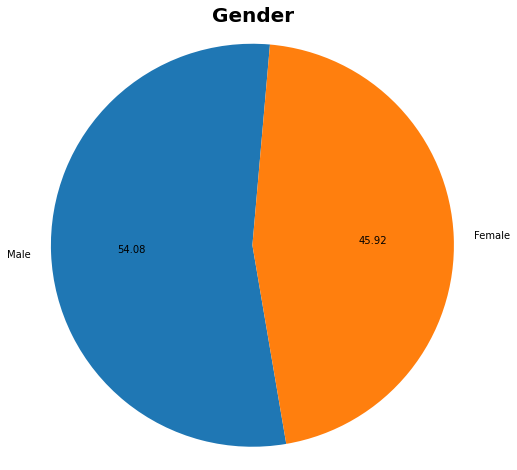

In [8]:
plt.figure(figsize=(8,8))
plt.pie(data.Gender.value_counts(),startangle=85,autopct='%.2f',radius=3,
        labels=['Male','Female'])
plt.title('Gender',fontdict={'fontsize':20,'fontweight':'bold'})
plt.axis('equal')
plt.show()

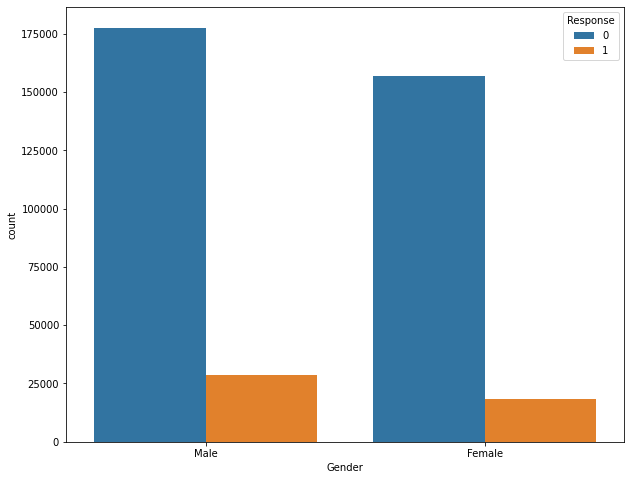

In [9]:
plt.figure(figsize=(10,8))
sb.countplot(data.Gender,hue=data.Response)

In [10]:
data.groupby(['Region_Code'])['Response'].sum()

Region_Code
0.0       174
1.0       109
2.0       287
3.0      1181
4.0       285
5.0       148
6.0       439
7.0       432
8.0      3257
9.0       253
10.0      263
11.0     1041
12.0      312
13.0      364
14.0      422
15.0      958
16.0      134
17.0      184
18.0      678
19.0      250
20.0      223
21.0      303
22.0       83
23.0      300
24.0      342
25.0      107
26.0      187
27.0      209
28.0    19917
29.0     1365
30.0      900
31.0      197
32.0      239
33.0      760
34.0      126
35.0      865
36.0      703
37.0      436
38.0      389
39.0      574
40.0      153
41.0     2224
42.0       44
43.0      244
44.0       33
45.0      615
46.0     2032
47.0      652
48.0      477
49.0      137
50.0      642
51.0       28
52.0       33
Name: Response, dtype: int64

Most of the people who responded positively are from region 3,8,11,28,29,41,46 .

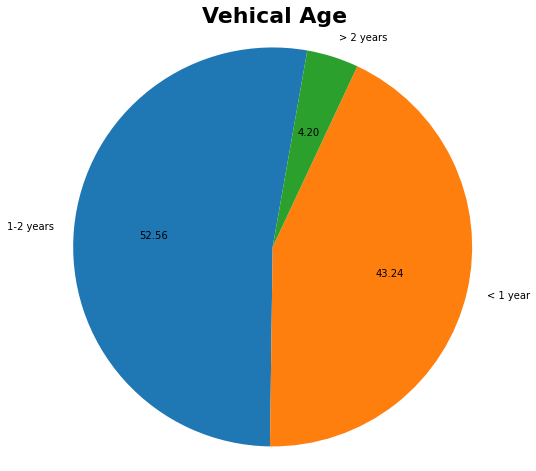

In [11]:
plt.figure(figsize=(8,8))
plt.pie(data.Vehicle_Age.value_counts(),startangle=80,autopct='%.2f',radius=3,
        labels=['1-2 years','< 1 year','> 2 years'])
plt.title('Vehical Age',fontdict={'fontsize':22,'fontweight':'bold'})
plt.axis('equal')
plt.show()

From above pie-chart, majority of our crowd has their vechicles in range of 1-2 Year's .

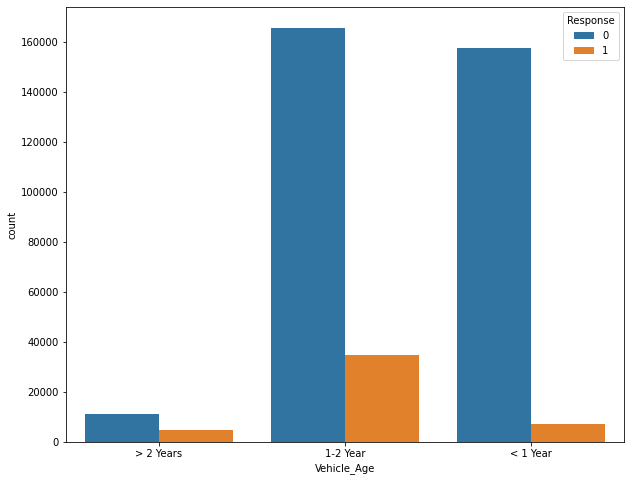

In [12]:
plt.figure(figsize=(10,8))
sb.countplot(data.Vehicle_Age,hue=data.Response)



*   People who's vechile age lies between 1-2 Year's of age are more keen towards buying vehicle insurance .
*   People who's vechile age is more than 2 Year's may already have previous insurance, hence less interested .

*   People who's vechile age is less than 1 Year are not too much interested in buying insurance .







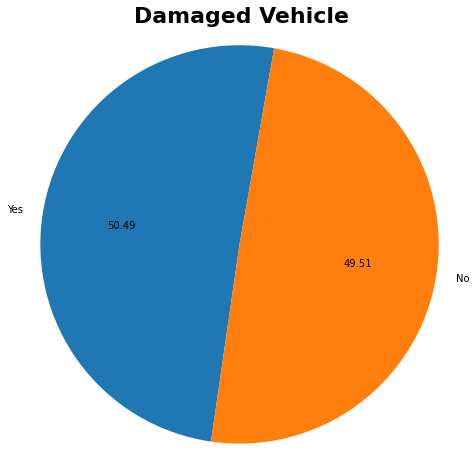

In [13]:
plt.figure(figsize=(8,8))
plt.pie(data.Vehicle_Damage.value_counts(),startangle=80,autopct='%.2f',radius=3
        ,labels=['Yes','No'])
plt.title('Damaged Vehicle',fontdict={'fontsize':22,'fontweight':'bold'})
plt.axis('equal')
plt.show()

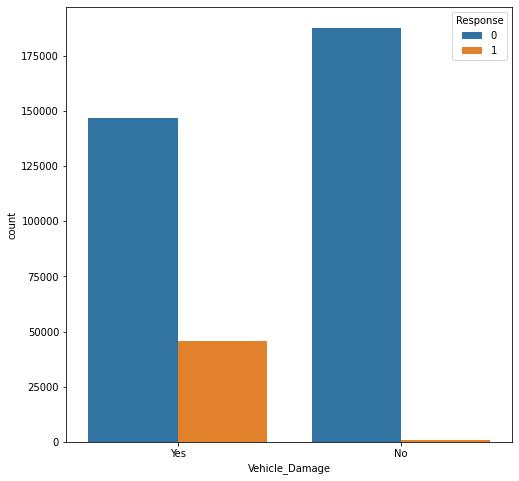

In [14]:
plt.figure(figsize=(8,8))
sb.countplot(data.Vehicle_Damage,hue=data.Response)

Most of the people who are giving us positive response have sustained any damage to their vehicle in past .

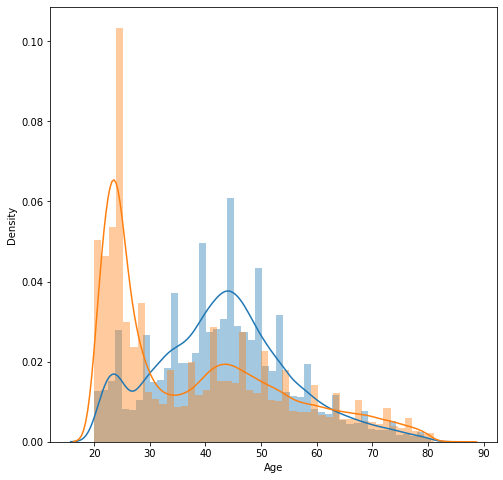

In [15]:
plt.figure(figsize=(8,8))
sb.distplot(data.Age[data.Response==1])
sb.distplot(data.Age[data.Response==0])



*   Here the blue curve represents to positive response i.e Response = 1 .

*   And the orange curve represents to negative response i.e Response = 0 .

*   We are getting positive response from those people who are likely to fall in category of age 35 - 50 Year's .

*   Where as people who are less than 35 Year's old are less interested to take any vehicle insurance . 

*   From here what we can depict is that we need to focus on our audience who lies between the 35 - 50 Year's of age . 





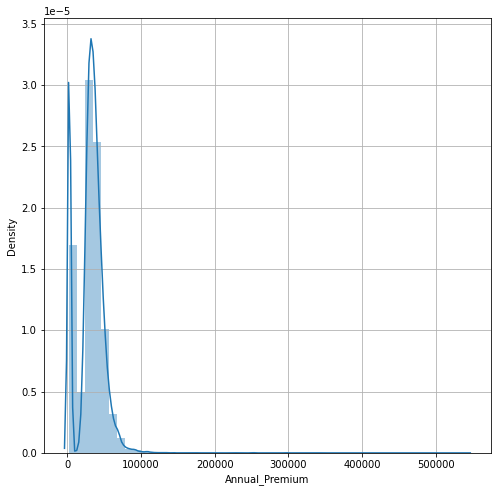

30564.389581458323


In [16]:
plt.figure(figsize=(8,8))
sb.distplot(data.Annual_Premium[data.Response==1])
plt.grid()
plt.show()
avg_Annual_Premium = data.Annual_Premium.mean()
print("{}".format(avg_Annual_Premium))

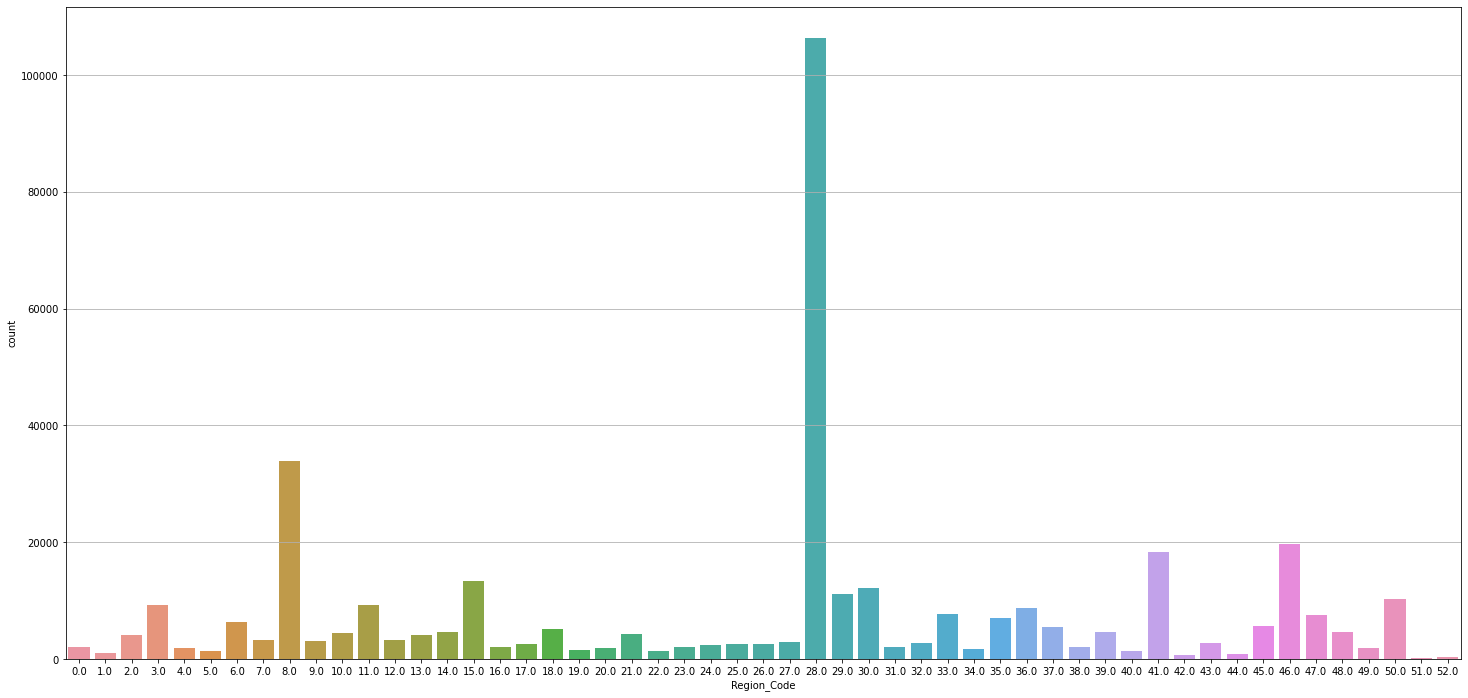

In [17]:
plt.figure(figsize=(25,12))
sb.countplot(data = data , x = 'Region_Code')
plt.grid(axis='y')

**Mapping Values**\
Converting string values of some features into integer values .

In [18]:
data.Gender=data.Gender.map({'Male':1 , 'Female':2})
data.Vehicle_Damage=data.Vehicle_Damage.map({'Yes':1 , 'No':0})
data.Vehicle_Age=data.Vehicle_Age.map({'< 1 Year':0 , '1-2 Year':1 
                                       , '> 2 Years':2})
data

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
id,,,,,,,,,,,
1,1,44,1,28.0,0,2,1,40454.0,26.0,217,1
2,1,76,1,3.0,0,1,0,33536.0,26.0,183,0
3,1,47,1,28.0,0,2,1,38294.0,26.0,27,1
4,1,21,1,11.0,1,0,0,28619.0,152.0,203,0
5,2,29,1,41.0,1,0,0,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...
381105,1,74,1,26.0,1,1,0,30170.0,26.0,88,0
381106,1,30,1,37.0,1,0,0,40016.0,152.0,131,0
381107,1,21,1,30.0,1,0,0,35118.0,160.0,161,0


Plotting HeatMap to see correlation between features .

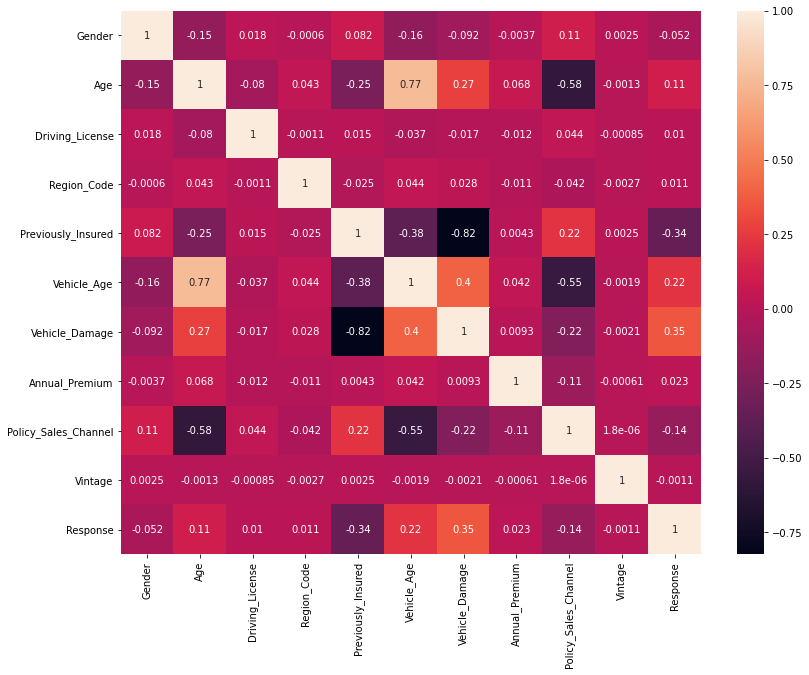

In [19]:
plt.figure(figsize=(13,10))
correlation = data.corr()
sb.heatmap(correlation , annot=True)

**Data Preprocessing**\
We will be using StandardScaler method for preprocessing . StandardScaler follows Standard Normal Distribution . Therefore, it makes mean = 0 and scales the data to unit variance .


In [20]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = data.drop(['Response','Gender','Vintage','Region_Code','Driving_License']
              ,axis=1)
X = sc.fit_transform(X)
Y = data['Response']

**Spliting train-test Data**

In [21]:
from sklearn.model_selection import train_test_split
X_train , X_test , Y_train , Y_test = train_test_split(X , Y , test_size=0.30 
                                                       , random_state=21)

**Model Training and Evaluation**
*   By seeing the dataset we have got an idea that either people will agree to take insurance or they will not .
*   So there are only two possible outcomes either Yes(Response=1) or No(Response=0) regarding taking insurance .
*   Therefore, this becomes a classification problem . To solve classification problem there are several algorithms like :

    1.   Logistic regression
    2.   Decision Trees
    1.   Random Forest
    2.   XGBoost 

*   We will be training our model on these algorithms and evaluate which gives us higher accuracy . 







In [22]:
accuracy_scores = {}

1. LOGISTIC REGRESSION

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
LRModel = LogisticRegression()
LRModel.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [24]:
predict_YLR = LRModel.predict(X_test)
train_ylr = LRModel.predict(X_train)
confusion_matrix(Y_test,predict_YLR)
accuracy_scores['LRModel']=accuracy_score(Y_test,predict_YLR)*100

In [25]:
print("TRAIN REPORT : \n")
print("accuracy score on trained data: {}".format(accuracy_score(Y_train
                                                              ,train_ylr)*100))

print("TEST REPORT : \n")
print("accuracy score on test data : {}".format(accuracy_score(Y_test
                                                            ,predict_YLR)*100))

TRAIN REPORT : 

accuracy score on trained data: 87.7125378594776
TEST REPORT : 

accuracy score on test data : 87.77168446555238


2. DECISION TREE

In [26]:
from sklearn import tree
DTModel = tree.DecisionTreeClassifier(max_depth=25,max_features='sqrt',random_state=21,criterion='entropy')
DTModel.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=25, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=21, splitter='best')

In [27]:
predict_YDT=DTModel.predict(X_test)
train_ydt = DTModel.predict(X_train)
print(confusion_matrix(Y_test,predict_YDT))
accuracy_scores['DTModel']=accuracy_score(Y_test,predict_YDT)*100

[[97077  3297]
 [12498  1461]]


In [28]:
print("TRAIN REPORT : \n")
print(classification_report(Y_train,train_ydt))

print("TEST REPORT : \n")
print(classification_report(Y_test,predict_YDT))

TRAIN REPORT : 

              precision    recall  f1-score   support

           0       0.91      1.00      0.95    234025
           1       0.89      0.30      0.45     32751

    accuracy                           0.91    266776
   macro avg       0.90      0.65      0.70    266776
weighted avg       0.91      0.91      0.89    266776

TEST REPORT : 

              precision    recall  f1-score   support

           0       0.89      0.97      0.92    100374
           1       0.31      0.10      0.16     13959

    accuracy                           0.86    114333
   macro avg       0.60      0.54      0.54    114333
weighted avg       0.82      0.86      0.83    114333



3. RANDOM FOREST

In [29]:
from sklearn.ensemble import RandomForestClassifier
RFModel = RandomForestClassifier(criterion='entropy',random_state=0
                                 ,n_estimators=150,max_depth=23
                                 ,max_features='sqrt')
RFModel.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=23, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [30]:
predict_YRF=RFModel.predict(X_test)
train_yrf = RFModel.predict(X_train)
print(confusion_matrix(Y_test,predict_YRF))
accuracy_scores['RFModel']=accuracy_score(Y_test,predict_YRF)*100

[[98623  1751]
 [12939  1020]]


In [31]:
print("TRAIN REPORT : \n")
print(classification_report(Y_train,train_yrf))

print("TEST REPORT : \n")
print(classification_report(Y_test,predict_YRF))

TRAIN REPORT : 

              precision    recall  f1-score   support

           0       0.91      1.00      0.95    234025
           1       0.97      0.27      0.42     32751

    accuracy                           0.91    266776
   macro avg       0.94      0.63      0.69    266776
weighted avg       0.91      0.91      0.89    266776

TEST REPORT : 

              precision    recall  f1-score   support

           0       0.88      0.98      0.93    100374
           1       0.37      0.07      0.12     13959

    accuracy                           0.87    114333
   macro avg       0.63      0.53      0.53    114333
weighted avg       0.82      0.87      0.83    114333



XGBOOST

In [32]:
from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators=600,learning_rate=0.02)
xgb.fit(X_train,Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.02, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=600, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [33]:
predict_xgb=xgb.predict(X_test)
train_xgb = xgb.predict(X_train)
print(confusion_matrix(Y_test,predict_xgb))
accuracy_scores['xgb']=accuracy_score(Y_test,predict_xgb)*100

[[100363     11]
 [ 13948     11]]


In [34]:
print("TRAIN REPORT : \n")
print(classification_report(Y_train,train_xgb))

print("TRAIN REPORT : \n")
print(classification_report(Y_test,predict_xgb))

TRAIN REPORT : 

              precision    recall  f1-score   support

           0       0.88      1.00      0.93    234025
           1       0.77      0.00      0.00     32751

    accuracy                           0.88    266776
   macro avg       0.83      0.50      0.47    266776
weighted avg       0.86      0.88      0.82    266776

TRAIN REPORT : 

              precision    recall  f1-score   support

           0       0.88      1.00      0.93    100374
           1       0.50      0.00      0.00     13959

    accuracy                           0.88    114333
   macro avg       0.69      0.50      0.47    114333
weighted avg       0.83      0.88      0.82    114333



{'LRModel': 87.77168446555238, 'DTModel': 86.18509091863241, 'RFModel': 87.15156603955113, 'xgb': 87.7909265041589}


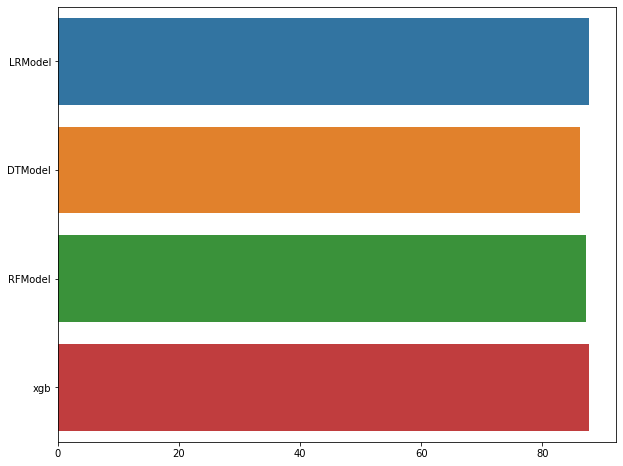

In [35]:
plt.figure(figsize=(10, 8))
accuracies = list(accuracy_scores.values())
names = list(accuracy_scores.keys())
sb.barplot(x=accuracies, y=names)
plt.grid
plt.legend
plt.show
print(accuracy_scores)

In [36]:
pickle.dump(LRModel,open('Insurance(LRModel).pkl','wb'))
pickle.dump(DTModel,open('Insurance(DTModel).pkl','wb'))
pickle.dump(RFModel,open('Insurance(RFModel).pkl','wb'))
pickle.dump(xgb,open('Insurance(xgb).pkl','wb'))

**Conclusion**

*   People who have experienced vehicle damage in past are interested to take insurance.
*   People who will be intrested in insurance will mostly have faced damage to their vehicle in past .
*   People who have used their vehicle's for 1-2 Year's will give good response toward insurance policy .
*   On an average a customer has to pay an amount of ₹ 30,564 .
*   Logistic Regression model and XGBoost model have almost same accuracy but XGBoost is slightly better than Logistic Regression model.
*   Also, we might see that while working with huge data and using algorithms like Random Forest and Decision Tree has a high chance of getting our model overfitted which might result in bad accuracy on training data . This can be seen above .